## Solar Flare Analysis

Articles

*A Blueprint of State-of-the-art Techniques for Detecting Quasi-periodic Pulsations in Solar and Stellar Flares
Anne-Marie Broomhall, James R. A. Davenport, Laura A. Hayes*
https://doi.org/10.3847/1538-4365/ab40b3

*KEPLER FLARES. II. THE TEMPORAL MORPHOLOGY OF WHITE-LIGHT FLARES ON GJ 1243
James R. A. Davenport, Suzanne L. Hawley, Leslie Hebb*
http://dx.doi.org/10.1088/0004-637X/797/2/122

contain descriptions of how to simulate signals that are registered by satellites during solar flares.

It has been empirically discovered that some of the registered signals contain so-called *quasi-periodic pulsations (QPPs)* that are decaying sinusoids and are clearly visible on wavelet spectrums of signals. The task is to learn to automatically divide signals into those that contain QPPs and those that do not.

The first article also contains a link to a GitHub repository with flares simulated by the authors. Let's download these files and plot their graphs.

In [35]:
import numpy as np
import pandas as pd
import scipy
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from astropy.io import fits

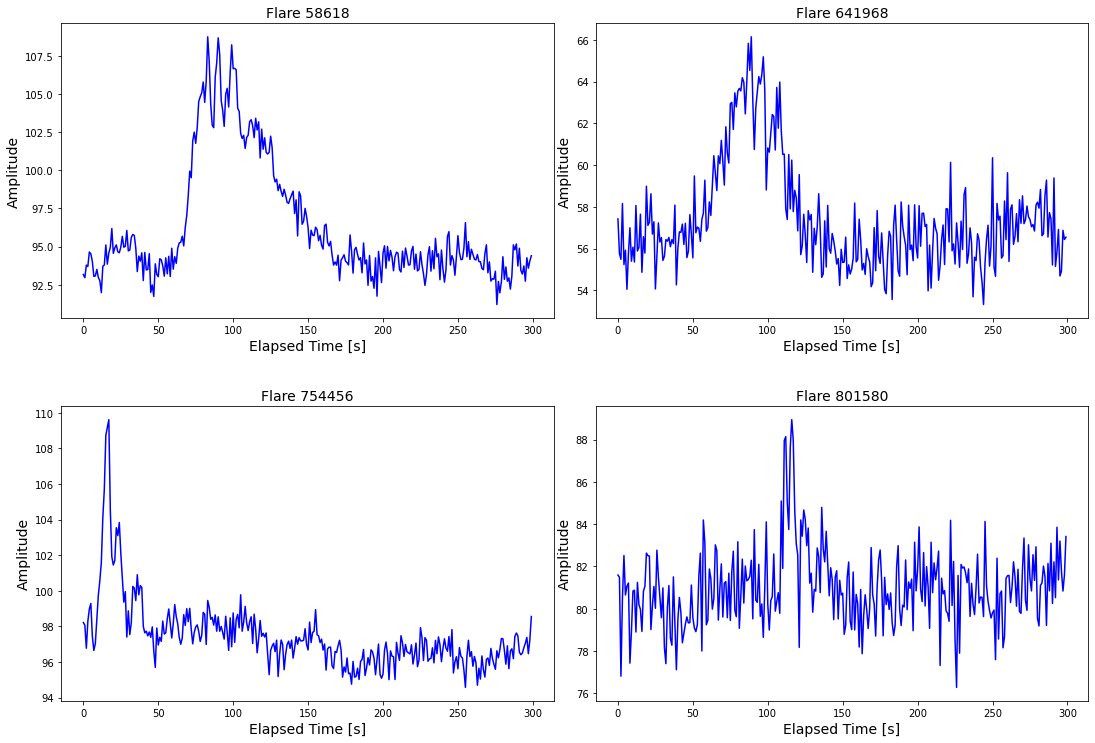

In [11]:
hdulist = fits.open('flare58618.fits')
hdu = hdulist[1]
a1 = np.zeros(len(hdu.data))
for i in range(len(hdu.data)):
    a1[i] = hdu.data[i][1]

hdulist = fits.open('flare641968.fits')
hdu = hdulist[1]
a2 = np.zeros(len(hdu.data))
for i in range(len(hdu.data)):
    a2[i] = hdu.data[i][1]

hdulist = fits.open('flare754456.fits')
hdu = hdulist[1]
a3 = np.zeros(len(hdu.data))
for i in range(len(hdu.data)):
    a3[i] = hdu.data[i][1]

hdulist = fits.open('flare801580.fits')
hdu = hdulist[1]
a4 = np.zeros(len(hdu.data))
for i in range(len(hdu.data)):
    a4[i] = hdu.data[i][1]

figure, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
figure.tight_layout()
plt.subplots_adjust(hspace=0.3)

axis[0, 0].set_title('Flare 58618', fontsize=14)
axis[0, 0].plot(a1, color='blue')
axis[0, 0].set_xlabel('Elapsed Time [s]', fontsize=14)
axis[0, 0].set_ylabel('Amplitude', fontsize=14)

axis[0, 1].set_title('Flare 641968', fontsize=14)
axis[0, 1].plot(a2, color='blue')
axis[0, 1].set_xlabel('Elapsed Time [s]', fontsize=14)
axis[0, 1].set_ylabel('Amplitude', fontsize=14)

axis[1, 0].set_title('Flare 754456', fontsize=14)
axis[1, 0].plot(a3, color='blue')
axis[1, 0].set_xlabel('Elapsed Time [s]', fontsize=14)
axis[1, 0].set_ylabel('Amplitude', fontsize=14)

axis[1, 1].set_title('Flare 801580', fontsize=14)
axis[1, 1].plot(a4, color='blue')
axis[1, 1].set_xlabel('Elapsed Time [s]', fontsize=14)
axis[1, 1].set_ylabel('Amplitude', fontsize=14)

plt.show()

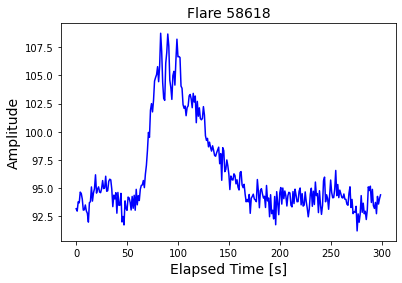

In [19]:
files1 = ['flare106440.fits', 'flare157421.fits', 'flare172146.fits', 'flare17583.fits',\
         'flare193230.fits', 'flare214510.fits', 'flare220365.fits', 'flare232443.fits',\
         'flare240468.fits', 'flare241503.fits', 'flare247089.fits', 'flare253143.fits',\
         'flare25412.fits', 'flare257130.fits', 'flare319271.fits', 'flare330751.fits',\
         'flare332211.fits', 'flare349139.fits', 'flare349572.fits', 'flare370383.fits',\
         'flare375344.fits', 'flare389761.fits', 'flare400805.fits', 'flare415945.fits',\
         'flare416568.fits', 'flare417198.fits', 'flare4173.fits', 'flare431137.fits',\
         'flare441391.fits', 'flare44144.fits', 'flare44430.fits', 'flare447595.fits',\
         'flare448786.fits', 'flare45851.fits', 'flare462747.fits', 'flare463836.fits',\
         'flare463945.fits', 'flare47197.fits', 'flare485392.fits', 'flare485962.fits',\
         'flare507646.fits', 'flare513372.fits', 'flare52975.fits', 'flare542396.fits',\
         'flare548986.fits', 'flare549106.fits', 'flare566801.fits', 'flare567069.fits',\
         'flare570462.fits', 'flare577493.fits', 'flare580919.fits', 'flare58469.fits',\
         'flare58618.fits', 'flare591006.fits', 'flare592857.fits', 'flare605543.fits',\
         'flare609049.fits', 'flare609148.fits', 'flare615516.fits', 'flare618098.fits',\
         'flare619865.fits', 'flare62351.fits', 'flare629040.fits', 'flare63094.fits',\
         'flare641968.fits', 'flare648677.fits', 'flare659347.fits', 'flare667020.fits',\
         'flare672353.fits', 'flare675105.fits', 'flare687371.fits', 'flare701326.fits',\
         'flare724818.fits', 'flare74595.fits', 'flare748751.fits', 'flare752622.fits',\
         'flare754456.fits', 'flare760450.fits', 'flare760859.fits', 'flare791390.fits',\
         'flare79970.fits', 'flare801580.fits', 'flare817353.fits', 'flare819418.fits',\
         'flare839257.fits', 'flare850725.fits', 'flare865527.fits', 'flare887052.fits',\
         'flare890239.fits', 'flare897338.fits', 'flare900333.fits', 'flare903776.fits',\
         'flare931675.fits', 'flare938963.fits', 'flare945054.fits', 'flare945331.fits',\
         'flare953328.fits', 'flare960520.fits', 'flare963202.fits', 'flare967801.fits',\
         'flare973056.fits']
flare_numbers1 = []
flare_to_number1 = dict()
for i in range(len(files1)):
    flare_numbers1.append(files1[i][5:-5])
    flare_to_number1[int(files1[i][5:-5])] = i
path1 = 'https://raw.githubusercontent.com/ambroomhall/flare_sims/8defe379ba680d0b5dd448f40973e1806c149311/'
flares_data1 = np.zeros((101, 300))
for i in range(len(files1)):
    path_to_file1 = path1 + files1[i]
    hdulist = fits.open(path_to_file1)
    hdu = hdulist[1]
    for j in range(len(hdu.data)):
        flares_data1[i][j] = hdu.data[j][1]

plt.plot(flares_data1[flare_to_number1[58618]], color='blue')
plt.title('Flare 58618', fontsize=14)
plt.xlabel('Elapsed Time [s]', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.show()

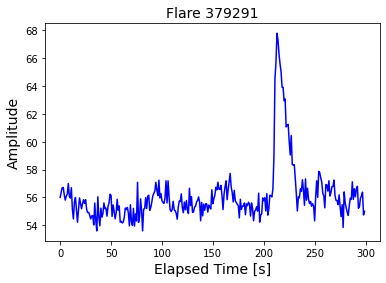

In [22]:
files = ['flare10788.fits', 'flare122522.fits', 'flare129113.fits', 'flare159804.fits',\
          'flare161404.fits', 'flare165101.fits', 'flare166659.fits', 'flare172202.fits',\
          'flare173913.fits', 'flare181841.fits', 'flare186811.fits', 'flare189376.fits',\
          'flare19470.fits', 'flare19778.fits', 'flare202467.fits', 'flare206268.fits',\
          'flare236578.fits', 'flare265386.fits', 'flare265704.fits', 'flare270100.fits',\
          'flare271094.fits', 'flare294407.fits', 'flare294432.fits', 'flare296222.fits',\
          'flare297054.fits', 'flare299667.fits', 'flare300829.fits', 'flare302062.fits',\
          'flare305069.fits', 'flare317016.fits', 'flare319153.fits', 'flare325910.fits',\
          'flare329919.fits', 'flare337630.fits', 'flare338322.fits', 'flare346770.fits',\
          'flare352381.fits', 'flare36096.fits', 'flare361207.fits', 'flare37274.fits',\
          'flare379291.fits', 'flare379938.fits', 'flare384314.fits', 'flare389450.fits',\
          'flare389522.fits', 'flare395421.fits', 'flare400029.fits', 'flare40287.fits',\
          'flare404267.fits', 'flare419839.fits', 'flare428659.fits', 'flare42890.fits',\
          'flare429937.fits', 'flare455290.fits', 'flare458825.fits', 'flare46475.fits',\
          'flare472866.fits', 'flare48429.fits', 'flare487534.fits', 'flare495362.fits',\
          'flare539360.fits', 'flare542708.fits', 'flare555140.fits', 'flare562635.fits',\
          'flare563266.fits', 'flare5700.fits', 'flare598396.fits', 'flare609742.fits',\
          'flare612579.fits', 'flare65858.fits', 'flare673371.fits', 'flare705126.fits',\
          'flare71150.fits', 'flare711796.fits', 'flare732564.fits', 'flare744131.fits',\
          'flare758518.fits', 'flare761192.fits', 'flare762506.fits', 'flare773629.fits',\
          'flare820146.fits', 'flare821893.fits', 'flare845195.fits', 'flare846898.fits',\
          'flare857620.fits', 'flare864638.fits', 'flare869934.fits', 'flare870036.fits',\
          'flare878437.fits', 'flare889948.fits', 'flare898375.fits', 'flare908144.fits',\
          'flare909778.fits', 'flare912965.fits', 'flare923302.fits', 'flare935871.fits',\
          'flare940137.fits', 'flare968250.fits', 'flare976425.fits', 'flare997404.fits']
flare_numbers = []
flare_to_number = dict()
for i in range(len(files)):
    flare_numbers.append(files[i][5:-5])
    flare_to_number[int(files[i][5:-5])] = i
path = 'https://raw.githubusercontent.com/ambroomhall/HH2/f36cccefc4fc209e8e155ff8ef40d218617c45b2/'
flares_data = np.zeros((100, 300))
for i in range(len(files)):
    path_to_file = path + files[i]
    hdulist = fits.open(path_to_file)
    hdu = hdulist[1]
    for j in range(len(hdu.data)):
        flares_data[i][j] = hdu.data[j][1]

plt.plot(flares_data[flare_to_number[379291]], color='blue')
plt.title('Flare 379291', fontsize=14)
plt.xlabel('Elapsed Time [s]', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.show()

There are not enoung signals in the GitHub repository to train a convolutional neural network. We'll generate signals of two types using the models from the article. Type 1 signals will have a trend that consists of two gaussoids with different standard deviations. Type 2 will have a trend that is a 4th degree polynomial up to the maximum, and an envelope of two intersecting exponents in the phase of decline. QPPs are added to some of the signals.

Below the code cell there are 4 graphs that correspond to four types of generated signals: a gaussoid or a polynomial with or without QPP.

In [63]:
import random

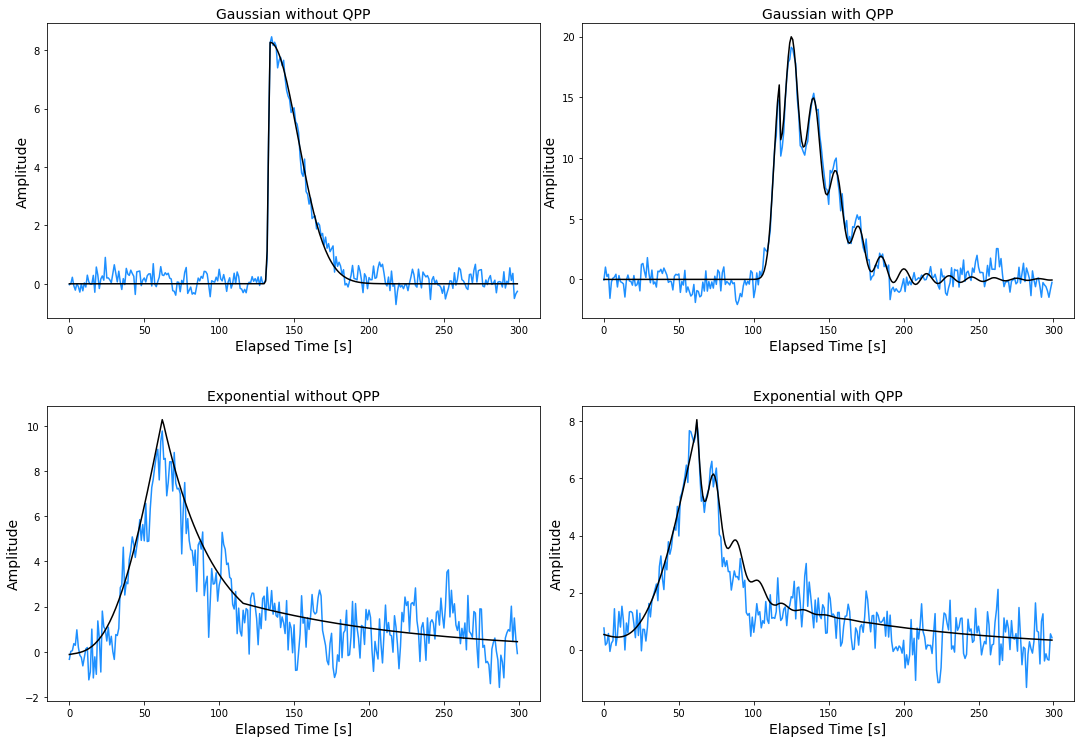

In [258]:
def add_qpp(x, A_flare, l_flare):
    phi = np.random.uniform(0, 2 * np.pi)
    select_P = [10, 20, 30]
    select_A_qpp = [0.1, 0.2, 0.3]
    select_t_e = [1/15, 1/10, 2/15, 1/5, 2/5]
    P = l_flare / random.choice(select_P)
    A_qpp = A_flare * random.choice(select_A_qpp)
    t_e = l_flare * random.choice(select_t_e)
    return A_qpp * np.exp(-x / t_e) * np.cos(2 * np.pi * x / P + phi)

def add_noise(S):
    N_white = S / random.choice(np.arange(3, 6))
    r = np.random.uniform(0.81, 0.99)
    N_red = S / max(1, 17 + np.random.normal(0, 1))
    white_noise = np.random.normal(0, N_white, 300)
    red_noise = np.zeros(300)
    red_noise[0] = N_red / 2
    for i in range(1, 300):
        red_noise[i] = r * red_noise[i - 1] + \
        np.power((1 - r * r), 0.5) * white_noise[i]
    noise = np.add(white_noise, red_noise)
    return noise
    

def gaussian(x, mu, sig, A=1):
    return A * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def gaussian_with_qpp(x, mu, sig, A_flare, l_flare):
    return A_flare * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) + \
add_qpp(x, A_flare, l_flare)

def generate_gaussian(contains_qpp=False):
    l_flare = np.random.uniform(100, 200)
    t_peak = np.random.randint(0.4 * l_flare, 300 - l_flare)
    A_flare = max(0.5, 10 + np.random.normal(0, 4))
    sig_rise = np.random.uniform(0.1, 3)
    sig_decay = np.random.uniform(5, 20)
    peak_flare = l_flare * t_peak / 300
    points1 = np.linspace(0.0, peak_flare, t_peak - 1, endpoint=False)
    points2 = np.linspace(0.0, l_flare - peak_flare, 300 - t_peak + 1)
    trend1 = gaussian(points1, peak_flare, sig_rise, A_flare)
    if contains_qpp:
        trend2 = gaussian_with_qpp(points2, 0.0, sig_decay, A_flare, l_flare)
    else:
        trend2 = gaussian(points2, 0.0, sig_decay, A_flare)
    
    trend = np.concatenate([trend1, trend2])
    trend_with_noise = np.add(trend, add_noise(np.mean(trend)))
    return trend, trend_with_noise


def polynomial(x, A=1):
    x0 = 1
    x1 = 1.941 + np.random.uniform(-0.008, 0.008)
    x2 = -0.175 + np.random.uniform(-0.032, 0.032)
    x3 = -2.246 + np.random.uniform(-0.039, 0.039)
    x4 = -1.125 + np.random.uniform(-0.016, 0.016)
    return A * (x0 + x1 * x + x2 * np.power(x, 2.) + x3 * np.power(x, 3.) + \
x4 * np.power(x, 4.))

def exp1(x, A=1):
    return A * 0.948 * np.exp(-0.965 * x)

def exp2(x, A=1):
    return A * 0.322 * np.exp(-0.290 * x)

def generate_exponential(contains_qpp=False):
    l_flare = np.random.uniform(100, 200)
    t_peak = np.random.randint(30, 300 - l_flare)
    A_flare = 10 + np.random.normal(0, 4)
    if A_flare < 0.5:
        A_flare = 0.5
    peak_flare = l_flare * t_peak / 300
    points1 = np.linspace(-1.0, 0.0, t_peak - 1, endpoint=False)
    num_point2 = int((300 - t_peak + 1) * 1.6 / 7)
    points2 = np.linspace(0.0, 1.6, num_point2 - 1, endpoint=False)
    points3 = np.linspace(1.6, 7, 300 - t_peak + 1 - num_point2 + 1)
    points_qpp = np.linspace(0.0, l_flare - peak_flare, 300 - t_peak + 1)
    trend1 = polynomial(points1, A_flare)
    trend2 = np.concatenate([exp1(points2, A_flare), exp2(points3, A_flare)])
    if contains_qpp:
        trend = np.concatenate([trend1, \
                                np.add(trend2, add_qpp(points_qpp, A_flare, l_flare))])
    else:
        trend = np.concatenate([trend1, trend2])
    trend_with_noise = np.add(trend, add_noise(np.mean(trend)))
    return trend, trend_with_noise
    
    
figure, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
figure.tight_layout()
plt.subplots_adjust(hspace=0.3)

g_f, g_f_n = generate_gaussian()

axis[0, 0].set_title('Gaussian without QPP', fontsize=14)
axis[0, 0].plot(g_f_n, color='dodgerblue')
axis[0, 0].plot(g_f, color='black')
axis[0, 0].set_xlabel('Elapsed Time [s]', fontsize=14)
axis[0, 0].set_ylabel('Amplitude', fontsize=14)

g_f, g_f_n = generate_gaussian(True)

axis[0, 1].set_title('Gaussian with QPP', fontsize=14)
axis[0, 1].plot(g_f_n, color='dodgerblue')
axis[0, 1].plot(g_f, color='black')
axis[0, 1].set_xlabel('Elapsed Time [s]', fontsize=14)
axis[0, 1].set_ylabel('Amplitude', fontsize=14)

g_f, g_f_n = generate_exponential()

axis[1, 0].set_title('Exponential without QPP', fontsize=14)
axis[1, 0].plot(g_f_n, color='dodgerblue')
axis[1, 0].plot(g_f, color='black')
axis[1, 0].set_xlabel('Elapsed Time [s]', fontsize=14)
axis[1, 0].set_ylabel('Amplitude', fontsize=14)

g_f, g_f_n = generate_exponential(True)

axis[1, 1].set_title('Exponential with QPP', fontsize=14)
axis[1, 1].plot(g_f_n, color='dodgerblue')
axis[1, 1].plot(g_f, color='black')
axis[1, 1].set_xlabel('Elapsed Time [s]', fontsize=14)
axis[1, 1].set_ylabel('Amplitude', fontsize=14)

plt.show()

Let's generate $20000$ signals and train a neural network on them.

In [297]:
def add_qpp(x, A_flare, l_flare):
    phi = np.random.uniform(0, 2 * np.pi)
    select_P = [10, 20, 30]
    select_A_qpp = [0.1, 0.2, 0.3]
    select_t_e = [1/10, 2/15, 1/5, 2/5]
    P = l_flare / random.choice(select_P)
    A_qpp = A_flare * random.choice(select_A_qpp)
    t_e = l_flare * random.choice(select_t_e)
    return A_qpp * np.exp(-x / t_e) * np.cos(2 * np.pi * x / P + phi)

def add_noise(S):
    N_white = S / random.choice(np.arange(3, 6))
    r = np.random.uniform(0.81, 0.99)
    N_red = S / max(1, 17 + np.random.normal(0, 1))
    white_noise = np.random.normal(0, N_white, 300)
    red_noise = np.zeros(300)
    red_noise[0] = N_red / 2
    for i in range(1, 300):
        red_noise[i] = r * red_noise[i - 1] + \
        np.power((1 - r * r), 0.5) * white_noise[i]
    noise = np.add(white_noise, red_noise)
    return noise
    

def gaussian(x, mu, sig, A=1):
    return A * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def gaussian_with_qpp(x, mu, sig, A_flare, l_flare):
    return A_flare * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) + \
add_qpp(x, A_flare, l_flare)

def generate_gaussian(contains_qpp=False):
    l_flare = np.random.uniform(100, 200)
    t_peak = np.random.randint(0.4 * l_flare, 300 - l_flare)
    A_flare = max(0.5, 10 + np.random.normal(0, 4))
    sig_rise = np.random.uniform(0.1, 3)
    sig_decay = np.random.uniform(5, 20)
    peak_flare = l_flare * t_peak / 300
    points1 = np.linspace(0.0, peak_flare, t_peak - 1, endpoint=False)
    points2 = np.linspace(0.0, l_flare - peak_flare, 300 - t_peak + 1)
    trend1 = gaussian(points1, peak_flare, sig_rise, A_flare)
    if contains_qpp:
        trend2 = gaussian_with_qpp(points2, 0.0, sig_decay, A_flare, l_flare)
    else:
        trend2 = gaussian(points2, 0.0, sig_decay, A_flare)
    
    trend = np.concatenate([trend1, trend2])
    trend_with_noise = np.add(trend, add_noise(np.mean(trend)))
    return trend_with_noise

def polynomial(x, A=1):
    x0 = 1
    x1 = 1.941 + np.random.uniform(-0.008, 0.008)
    x2 = -0.175 + np.random.uniform(-0.032, 0.032)
    x3 = -2.246 + np.random.uniform(-0.039, 0.039)
    x4 = -1.125 + np.random.uniform(-0.016, 0.016)
    return A * (x0 + x1 * x + x2 * np.power(x, 2.) + x3 * np.power(x, 3.) + \
x4 * np.power(x, 4.))

def exp1(x, A=1):
    return A * 0.948 * np.exp(-0.965 * x)

def exp2(x, A=1):
    return A * 0.322 * np.exp(-0.290 * x)

def generate_exponential(contains_qpp=False):
    l_flare = np.random.uniform(100, 200)
    t_peak = np.random.randint(30, 300 - l_flare)
    A_flare = 10 + np.random.normal(0, 4)
    if A_flare < 0.5:
        A_flare = 0.5
    peak_flare = l_flare * t_peak / 300
    points1 = np.linspace(-1.0, 0.0, t_peak - 1, endpoint=False)
    num_point2 = int((300 - t_peak + 1) * 1.6 / 7)
    points2 = np.linspace(0.0, 1.6, num_point2 - 1, endpoint=False)
    points3 = np.linspace(1.6, 7, 300 - t_peak + 1 - num_point2 + 1)
    points_qpp = np.linspace(0.0, l_flare - peak_flare, 300 - t_peak + 1)
    trend1 = polynomial(points1, A_flare)
    trend2 = np.concatenate([exp1(points2, A_flare), exp2(points3, A_flare)])
    if contains_qpp:
        trend = np.concatenate([trend1, \
                                np.add(trend2, add_qpp(points_qpp, A_flare, l_flare))])
    else:
        trend = np.concatenate([trend1, trend2])
    trend_with_noise = np.add(trend, add_noise(np.mean(trend)))
    return trend_with_noise

exponential_no_qpp = 0
exponential_qpp = 0
gaussian_no_qpp = 0
gaussian_qpp = 0

with open('flare_data.txt', 'w') as f:
    for i in range(20000):
        flare_type = np.random.randint(2)
        has_qpp = np.random.randint(2)
        inf = np.zeros(2)
        inf[0] = has_qpp
        inf[1] = flare_type
        if flare_type:
            if has_qpp:
                flare = generate_gaussian(True)
                res = np.concatenate([inf, flare])
                f.write("%s\n" % ' '.join(list(map(str, res))))
                gaussian_qpp += 1
            else:
                flare = generate_gaussian(False)
                res = np.concatenate([inf, flare])
                f.write("%s\n" % ' '.join(list(map(str, res))))
                gaussian_no_qpp += 1
        else:
            if has_qpp:
                flare = generate_exponential(True)
                res = np.concatenate([inf, flare])
                f.write("%s\n" % ' '.join(list(map(str, res))))
                exponential_qpp += 1
            else:
                flare = generate_exponential(False)
                res = np.concatenate([inf, flare])
                f.write("%s\n" % ' '.join(list(map(str, res))))
                exponential_no_qpp += 1

print('File contains')
print(exponential_no_qpp, 'exponential flares without QPP')
print(exponential_qpp, 'exponential flares with QPP')
print(gaussian_no_qpp, 'gaussian flares without QPP')
print(gaussian_qpp, 'gaussian flares with QPP')

File contains
4966 exponential flares without QPP
5051 exponential flares with QPP
4959 gaussian flares without QPP
5024 gaussian flares with QPP


One of the resulting signals.

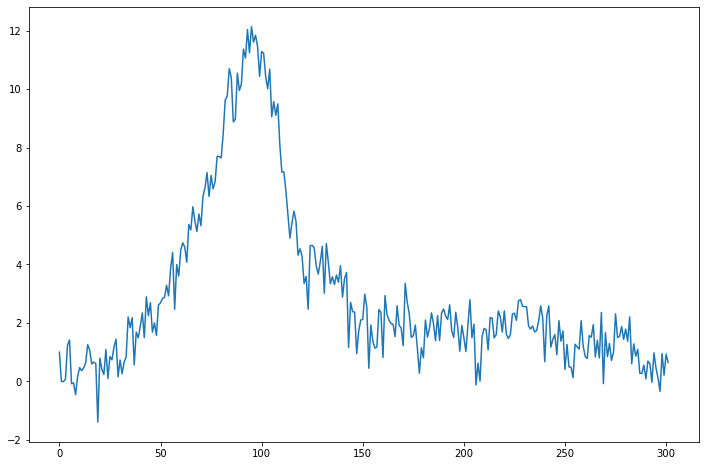

In [316]:
data = np.loadtxt('flare_data.txt')
has_qpp = data[:,0]
flare_type = data[:,1]
data1 = data[:,2:]
plt.plot(data[7])
plt.show()

Randomly divide 20000 signals into 16000 for training and 4000 for testing.

In [298]:
from sklearn.model_selection import train_test_split
data = np.loadtxt('flare_data.txt')
y = data[:,0]
X = data[:,2:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(len(X_train), X_train[0].size)

16000 300


Train a convolutional neural network to classify signals as having QPP or not based on continuous wavelet transform spectrograms with Morlet mother wavelet.

In [282]:
import pywt

In [299]:
train_size = 16000
test_size = 4000
scales = range(1,128)
waveletname = 'morl'
train_data_cwt = np.ndarray(shape=(train_size, 127, 299))
for i in range(0, train_size):
    signal = X_train[i]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:299]
    train_data_cwt[i, :, :] = coeff_

test_data_cwt = np.ndarray(shape=(test_size, 127, 299))
for i in range(0,test_size):
    signal = X_test[i]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:299]
    test_data_cwt[i, :, :] = coeff_

In [292]:
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.callbacks import History 
history = History()

In [300]:
from keras.utils.np_utils import to_categorical
x_train = train_data_cwt
x_test = test_data_cwt
img_x = 127
img_y = 299
num_classes = 2

batch_size = 16
epochs = 10

input_shape = (img_x, img_y)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (16000, 127, 299)
16000 train samples
4000 test samples


In [301]:
model = Sequential()
model.add(Conv1D(32, kernel_size=5, strides=1, activation='relu', input_shape=input_shape)) 
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer="adam", 
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, 
          epochs=epochs, verbose=1, 
          validation_data=(x_test, y_test), 
          callbacks=[history])

train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Epoch 1/10
1000/1000 [==============================] - 22s 20ms/step - loss: 1.4007 - accuracy: 0.6164 - val_loss: 0.5057 - val_accuracy: 0.7577
Epoch 2/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.4635 - accuracy: 0.7800 - val_loss: 0.4770 - val_accuracy: 0.7630
Epoch 3/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.4212 - accuracy: 0.8043 - val_loss: 0.4732 - val_accuracy: 0.7818
Epoch 4/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.3922 - accuracy: 0.8246 - val_loss: 0.4751 - val_accuracy: 0.7958
Epoch 5/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.3788 - accuracy: 0.8333 - val_loss: 0.4777 - val_accuracy: 0.7883
Epoch 6/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.3628 - accuracy: 0.8353 - val_loss: 0.4474 - val_accuracy: 0.8030
Epoch 7/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.3306 - accuracy: 0.8609 - val_loss: 0.4734 -

Accuracy of this neural network on test data is $81.15\%$

***
Let's try to improve accuracy by using more data for traing. Generate 40000 signals for that.

In [311]:
def add_qpp(x, A_flare, l_flare):
    phi = np.random.uniform(0, 2 * np.pi)
    select_P = [10, 20, 30]
    select_A_qpp = [0.1, 0.2, 0.3]
    select_t_e = [1/10, 2/15, 1/5, 2/5]
    P = l_flare / random.choice(select_P)
    A_qpp = A_flare * random.choice(select_A_qpp)
    t_e = l_flare * random.choice(select_t_e)
    return A_qpp * np.exp(-x / t_e) * np.cos(2 * np.pi * x / P + phi)

def add_noise(S):
    N_white = S / random.choice(np.arange(3, 6))
    r = np.random.uniform(0.81, 0.99)
    N_red = S / max(1, 17 + np.random.normal(0, 1))
    white_noise = np.random.normal(0, N_white, 300)
    red_noise = np.zeros(300)
    red_noise[0] = N_red / 2
    for i in range(1, 300):
        red_noise[i] = r * red_noise[i - 1] + \
        np.power((1 - r * r), 0.5) * white_noise[i]
    noise = np.add(white_noise, red_noise)
    return noise
    

def gaussian(x, mu, sig, A=1):
    return A * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def gaussian_with_qpp(x, mu, sig, A_flare, l_flare):
    return A_flare * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) + \
add_qpp(x, A_flare, l_flare)

def generate_gaussian(contains_qpp=False):
    l_flare = np.random.uniform(100, 200)
    t_peak = np.random.randint(0.4 * l_flare, 300 - l_flare)
    A_flare = max(0.5, 10 + np.random.normal(0, 4))
    sig_rise = np.random.uniform(0.1, 3)
    sig_decay = np.random.uniform(5, 20)
    peak_flare = l_flare * t_peak / 300
    points1 = np.linspace(0.0, peak_flare, t_peak - 1, endpoint=False)
    points2 = np.linspace(0.0, l_flare - peak_flare, 300 - t_peak + 1)
    trend1 = gaussian(points1, peak_flare, sig_rise, A_flare)
    if contains_qpp:
        trend2 = gaussian_with_qpp(points2, 0.0, sig_decay, A_flare, l_flare)
    else:
        trend2 = gaussian(points2, 0.0, sig_decay, A_flare)
    
    trend = np.concatenate([trend1, trend2])
    trend_with_noise = np.add(trend, add_noise(np.mean(trend)))
    return trend_with_noise

def polynomial(x, A=1):
    x0 = 1
    x1 = 1.941 + np.random.uniform(-0.008, 0.008)
    x2 = -0.175 + np.random.uniform(-0.032, 0.032)
    x3 = -2.246 + np.random.uniform(-0.039, 0.039)
    x4 = -1.125 + np.random.uniform(-0.016, 0.016)
    return A * (x0 + x1 * x + x2 * np.power(x, 2.) + x3 * np.power(x, 3.) + \
x4 * np.power(x, 4.))

def exp1(x, A=1):
    return A * 0.948 * np.exp(-0.965 * x)

def exp2(x, A=1):
    return A * 0.322 * np.exp(-0.290 * x)

def generate_exponential(contains_qpp=False):
    l_flare = np.random.uniform(100, 200)
    t_peak = np.random.randint(30, 300 - l_flare)
    A_flare = 10 + np.random.normal(0, 4)
    if A_flare < 0.5:
        A_flare = 0.5
    peak_flare = l_flare * t_peak / 300
    points1 = np.linspace(-1.0, 0.0, t_peak - 1, endpoint=False)
    num_point2 = int((300 - t_peak + 1) * 1.6 / 7)
    points2 = np.linspace(0.0, 1.6, num_point2 - 1, endpoint=False)
    points3 = np.linspace(1.6, 7, 300 - t_peak + 1 - num_point2 + 1)
    points_qpp = np.linspace(0.0, l_flare - peak_flare, 300 - t_peak + 1)
    trend1 = polynomial(points1, A_flare)
    trend2 = np.concatenate([exp1(points2, A_flare), exp2(points3, A_flare)])
    if contains_qpp:
        trend = np.concatenate([trend1, \
                                np.add(trend2, add_qpp(points_qpp, A_flare, l_flare))])
    else:
        trend = np.concatenate([trend1, trend2])
    trend_with_noise = np.add(trend, add_noise(np.mean(trend)))
    return trend_with_noise

exponential_no_qpp = 0
exponential_qpp = 0
gaussian_no_qpp = 0
gaussian_qpp = 0

with open('big_flare_data.txt', 'w') as f:
    for i in range(40000):
        flare_type = np.random.randint(2)
        has_qpp = np.random.randint(2)
        inf = np.zeros(2)
        inf[0] = has_qpp
        inf[1] = flare_type
        if flare_type:
            if has_qpp:
                flare = generate_gaussian(True)
                res = np.concatenate([inf, flare])
                f.write("%s\n" % ' '.join(list(map(str, res))))
                gaussian_qpp += 1
            else:
                flare = generate_gaussian(False)
                res = np.concatenate([inf, flare])
                f.write("%s\n" % ' '.join(list(map(str, res))))
                gaussian_no_qpp += 1
        else:
            if has_qpp:
                flare = generate_exponential(True)
                res = np.concatenate([inf, flare])
                f.write("%s\n" % ' '.join(list(map(str, res))))
                exponential_qpp += 1
            else:
                flare = generate_exponential(False)
                res = np.concatenate([inf, flare])
                f.write("%s\n" % ' '.join(list(map(str, res))))
                exponential_no_qpp += 1

print('File contains')
print(exponential_no_qpp, 'exponential flares without QPP')
print(exponential_qpp, 'exponential flares with QPP')
print(gaussian_no_qpp, 'gaussian flares without QPP')
print(gaussian_qpp, 'gaussian flares with QPP')

File contains
10073 exponential flares without QPP
9958 exponential flares with QPP
10043 gaussian flares without QPP
9926 gaussian flares with QPP


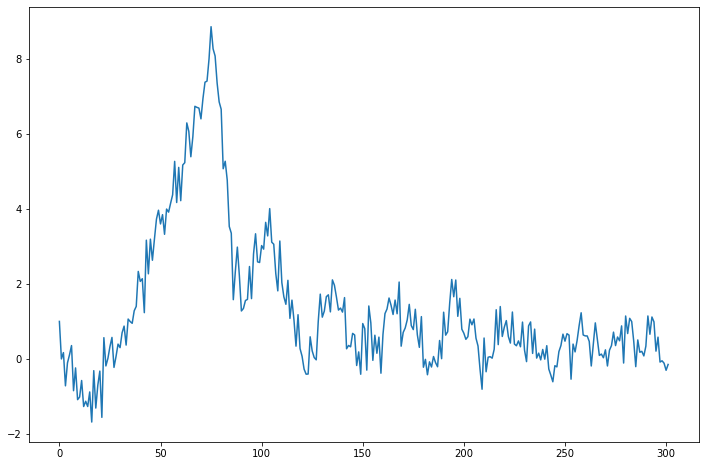

In [318]:
data = np.loadtxt('big_flare_data.txt')
has_qpp = data[:,0]
flare_type = data[:,1]
data1 = data[:,2:]
plt.plot(data[5])
plt.show()

Divide signals into 32000 for training and 8000 for testing.

In [312]:
from sklearn.model_selection import train_test_split
data = np.loadtxt('big_flare_data.txt')
y = data[:,0]
X = data[:,2:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(len(X_train), X_train[0].size)

32000 300


In [313]:
train_size = 32000
test_size = 8000
scales = range(1,128)
waveletname = 'morl'
train_data_cwt = np.ndarray(shape=(train_size, 127, 299))
for i in range(0, train_size):
    signal = X_train[i]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:299]
    train_data_cwt[i, :, :] = coeff_

test_data_cwt = np.ndarray(shape=(test_size, 127, 299))
for i in range(0,test_size):
    signal = X_test[i]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:299]
    test_data_cwt[i, :, :] = coeff_
    
history = History()

In [314]:
from keras.utils.np_utils import to_categorical
x_train = train_data_cwt
x_test = test_data_cwt
img_x = 127
img_y = 299
num_classes = 2

batch_size = 16
epochs = 10

input_shape = (img_x, img_y)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (32000, 127, 299)
32000 train samples
8000 test samples


In [315]:
model1 = Sequential()
model1.add(Conv1D(32, kernel_size=5, strides=1, activation='relu', input_shape=input_shape)) 
model1.add(MaxPooling1D(pool_size=2, strides=2))
model1.add(Conv1D(64, 5, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1000, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer="adam", 
              metrics=['accuracy'])

model1.fit(x_train, y_train, batch_size=batch_size, 
          epochs=epochs, verbose=1, 
          validation_data=(x_test, y_test), 
          callbacks=[history])

train_score = model1.evaluate(x_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Epoch 1/10
2000/2000 [==============================] - 69s 34ms/step - loss: 0.9618 - accuracy: 0.6579 - val_loss: 0.4264 - val_accuracy: 0.8036
Epoch 2/10
2000/2000 [==============================] - 67s 34ms/step - loss: 0.4302 - accuracy: 0.8019 - val_loss: 0.4181 - val_accuracy: 0.8065
Epoch 3/10
2000/2000 [==============================] - 63s 32ms/step - loss: 0.4104 - accuracy: 0.8143 - val_loss: 0.4205 - val_accuracy: 0.8099
Epoch 4/10
2000/2000 [==============================] - 69s 35ms/step - loss: 0.3767 - accuracy: 0.8350 - val_loss: 0.4067 - val_accuracy: 0.8159
Epoch 5/10
2000/2000 [==============================] - 71s 36ms/step - loss: 0.3521 - accuracy: 0.8446 - val_loss: 0.4006 - val_accuracy: 0.8266
Epoch 6/10
2000/2000 [==============================] - 71s 36ms/step - loss: 0.3268 - accuracy: 0.8622 - val_loss: 0.3746 - val_accuracy: 0.8344
Epoch 7/10
2000/2000 [==============================] - 72s 36ms/step - loss: 0.3193 - accuracy: 0.8656 - val_loss: 0.3733 -

Accuracy of this neural network on test data is $84.47\%$

Plot how accuracy of the neural network changed with training epochs.

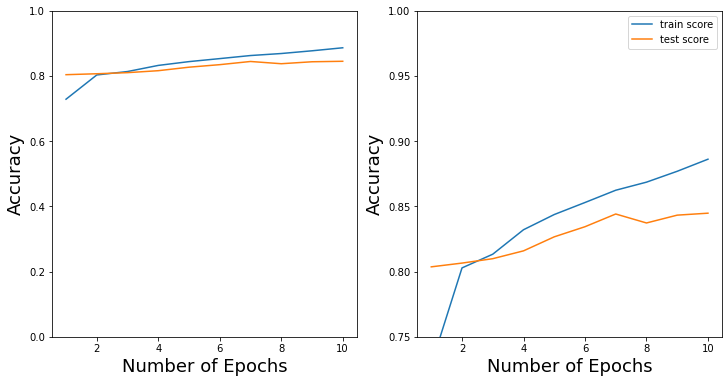

In [322]:
fig, axarr = plt.subplots(figsize=(12,6), ncols=2)
axarr[0].plot(range(1, 11), history.history['accuracy'], label='train score')
axarr[0].plot(range(1, 11), history.history['val_accuracy'], label='test score')
axarr[0].set_xlabel('Number of Epochs', fontsize=18)
axarr[0].set_ylabel('Accuracy', fontsize=18)
axarr[0].set_ylim([0,1])
axarr[1].plot(range(1, 11), history.history['accuracy'], label='train score')
axarr[1].plot(range(1, 11), history.history['val_accuracy'], label='test score')
axarr[1].set_xlabel('Number of Epochs', fontsize=18)
axarr[1].set_ylabel('Accuracy', fontsize=18)
axarr[1].set_ylim([0.75,1])
plt.legend()
plt.show()

Check how accurate this neural network is on the data generated by the authors of the article.

In [324]:
from astropy.io import fits

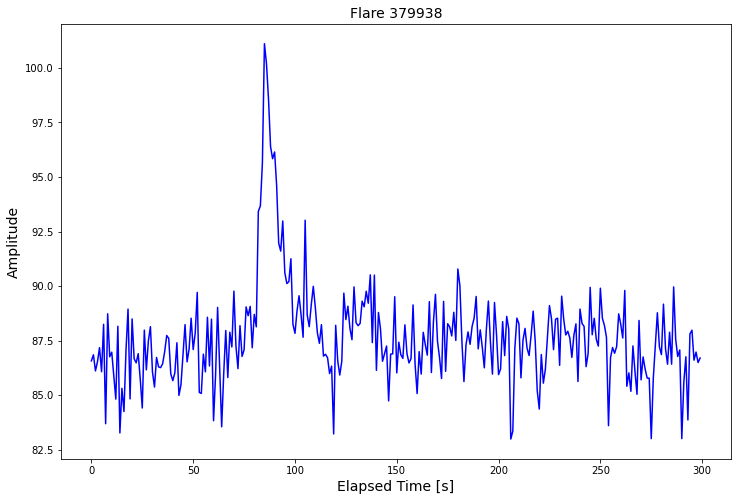

In [327]:
files = ['flare10788.fits', 'flare122522.fits', 'flare129113.fits', 'flare159804.fits',\
          'flare161404.fits', 'flare165101.fits', 'flare166659.fits', 'flare172202.fits',\
          'flare173913.fits', 'flare181841.fits', 'flare186811.fits', 'flare189376.fits',\
          'flare19470.fits', 'flare19778.fits', 'flare202467.fits', 'flare206268.fits',\
          'flare236578.fits', 'flare265386.fits', 'flare265704.fits', 'flare270100.fits',\
          'flare271094.fits', 'flare294407.fits', 'flare294432.fits', 'flare296222.fits',\
          'flare297054.fits', 'flare299667.fits', 'flare300829.fits', 'flare302062.fits',\
          'flare305069.fits', 'flare317016.fits', 'flare319153.fits', 'flare325910.fits',\
          'flare329919.fits', 'flare337630.fits', 'flare338322.fits', 'flare346770.fits',\
          'flare352381.fits', 'flare36096.fits', 'flare361207.fits', 'flare37274.fits',\
          'flare379291.fits', 'flare379938.fits', 'flare384314.fits', 'flare389450.fits',\
          'flare389522.fits', 'flare395421.fits', 'flare400029.fits', 'flare40287.fits',\
          'flare404267.fits', 'flare419839.fits', 'flare428659.fits', 'flare42890.fits',\
          'flare429937.fits', 'flare455290.fits', 'flare458825.fits', 'flare46475.fits',\
          'flare472866.fits', 'flare48429.fits', 'flare487534.fits', 'flare495362.fits',\
          'flare539360.fits', 'flare542708.fits', 'flare555140.fits', 'flare562635.fits',\
          'flare563266.fits', 'flare5700.fits', 'flare598396.fits', 'flare609742.fits',\
          'flare612579.fits', 'flare65858.fits', 'flare673371.fits', 'flare705126.fits',\
          'flare71150.fits', 'flare711796.fits', 'flare732564.fits', 'flare744131.fits',\
          'flare758518.fits', 'flare761192.fits', 'flare762506.fits', 'flare773629.fits',\
          'flare820146.fits', 'flare821893.fits', 'flare845195.fits', 'flare846898.fits',\
          'flare857620.fits', 'flare864638.fits', 'flare869934.fits', 'flare870036.fits',\
          'flare878437.fits', 'flare889948.fits', 'flare898375.fits', 'flare908144.fits',\
          'flare909778.fits', 'flare912965.fits', 'flare923302.fits', 'flare935871.fits',\
          'flare940137.fits', 'flare968250.fits', 'flare976425.fits', 'flare997404.fits']
flare_numbers = []
flare_to_number = dict()
for i in range(len(files)):
    flare_numbers.append(files[i][5:-5])
    flare_to_number[int(files[i][5:-5])] = i
path = 'https://raw.githubusercontent.com/ambroomhall/HH2/f36cccefc4fc209e8e155ff8ef40d218617c45b2/'
flares_data = np.zeros((100, 300))
for i in range(len(files)):
    path_to_file = path + files[i]
    hdulist = fits.open(path_to_file)
    hdu = hdulist[1]
    for j in range(len(hdu.data)):
        flares_data[i][j] = hdu.data[j][1]

plt.plot(flares_data[flare_to_number[379938]], color='blue')
plt.title('Flare 379938', fontsize=14)
plt.xlabel('Elapsed Time [s]', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.show()

In [343]:
from numpy import genfromtxt
descr = genfromtxt('qpp_type_hh2.csv', delimiter=',')
y_validate = np.zeros((100, 1))
has_qpp = [10, 20]
ind = 0
for i in range(len(descr)):
    code = descr[i][1]
    if code in has_qpp:
        y_validate[i][0] = 1

In [344]:
validate_data_cwt = np.ndarray(shape=(100, 127, 299))
for i in range(0, 100):
    signal = flares_data[i]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:299]
    validate_data_cwt[i, :, :] = coeff_

In [346]:
x_validate = validate_data_cwt
x_validate = x_validate.astype('float32')
y_validate = to_categorical(y_validate, num_classes)

In [347]:
val_score = model1.evaluate(x_validate, y_validate, verbose=0)
print('Real flare data loss: {}, Real flare data accuracy: {}'.format(val_score[0], val_score[1]))

Real flare data loss: 3.2109007835388184, Real flare data accuracy: 0.6800000071525574


Accuracy on this data is $68\%$.

A possible explanation of decline in accuracy are differences in some parameters of signal generation.



***
*Attachment*: visualization of wavelet-spectrum of one of the generated signals.

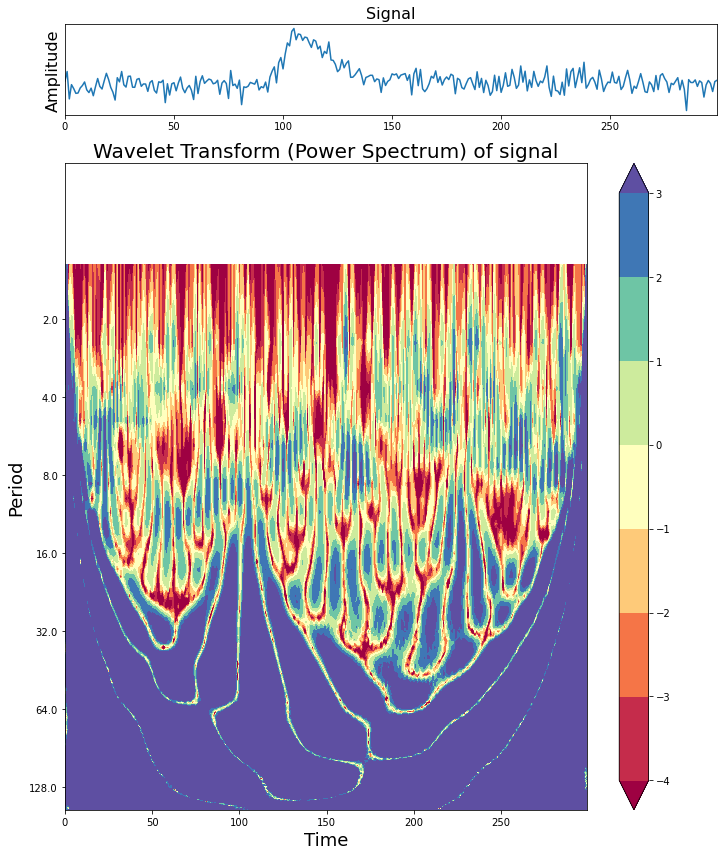

In [378]:
def plot_signal(ax, time, signal, average_over = 5):
    ax.plot(time, signal)
    ax.set_xlim([time[0], time[-1]])
    ax.set_yticks([])
    ax.set_ylabel('Amplitude', fontsize=16)
    ax.set_title('Signal', fontsize=16)


def plot_wavelet(ax, time, signal, scales, waveletname = 'morl', 
                 cmap = plt.cm.Spectral, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, \
                     extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    plt.colorbar(im)
    return yticks, ylim

N = 300
t0=0
dt=1
time = np.arange(0, N) * dt + t0
signal = flares_data[2]

scales = np.arange(1, 128)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period'
xlabel = 'Time'


fig = plt.figure(figsize=(12,12))
spec = gridspec.GridSpec(ncols=6, nrows=6)
top_ax = fig.add_subplot(spec[0, 0:5])
bottom_left_ax = fig.add_subplot(spec[1:, 0:5])

plot_signal(top_ax, time, signal, average_over = 3)
yticks, ylim = plot_wavelet(bottom_left_ax, time, signal, scales, xlabel=xlabel, ylabel=ylabel, title=title)

plt.tight_layout()
plt.show()